# Challenge 5 - 2020 Performance

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('bmh')
from sklearn.metrics import mean_squared_error

## 1. Results in 2020

As first thing, let us look at the results for 2020 again:

In [2]:
# read data
raw_url = 'https://raw.githubusercontent.com/leoiania/interviews-data-science-assignment/1b0d1c082053383f7f292f17e95f830cd259bbcc/datasets/italian-power-load/load.csv'
data = pd.read_csv(raw_url, parse_dates=['Date'], index_col='Date')


The model cannot be loaded from github - so do again the training:

In [3]:

# load the model and update for 2020
# model_one = sm.load('1_y_model') 


In [4]:
train_data = data.loc[:'2018']
model = sm.tsa.statespace.SARIMAX(train_data,
                                  order=(0,0,0),
                                  seasonal_order=(1,0,0,140),                                 
                                  freq='D')

# fit the model to the data
results = model.fit()

c:\ProgramData\Anaconda3\envs\text_mining\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [5]:

new_observations = data.loc['2019']
updated_20 = results.extend(new_observations)

# forecast again
preds_20 = updated_20.forecast(steps=366) 

Plot the forecast vs observed:

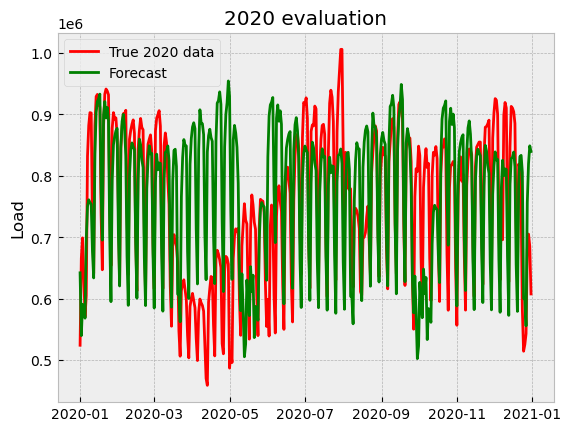

In [6]:
plt.plot(data.loc['2020'], color = "red",label = 'True 2020 data')
plt.plot(preds_20, color='green', label = 'Forecast')
plt.ylabel('Load')
plt.title("2020 evaluation")
plt.legend()
plt.show()

RMSE of 2020:

In [7]:
rmse_20 = mean_squared_error(data.loc['2020'].Load.values,
                          preds_20,squared = False)
print(rmse_20)

print('relative measure of rmse w.r.t range:')
print(rmse_20/(np.max(data.Load.values)-np.min(data.Load.values)))

118492.0063425172
relative measure of rmse w.r.t range:
0.16236182124257353


## 2. Differences and pecularities of this year

If we look at how the series behaves in 2020 versus some other years, we can see that there is a difference and probably it explains the different results obtained:

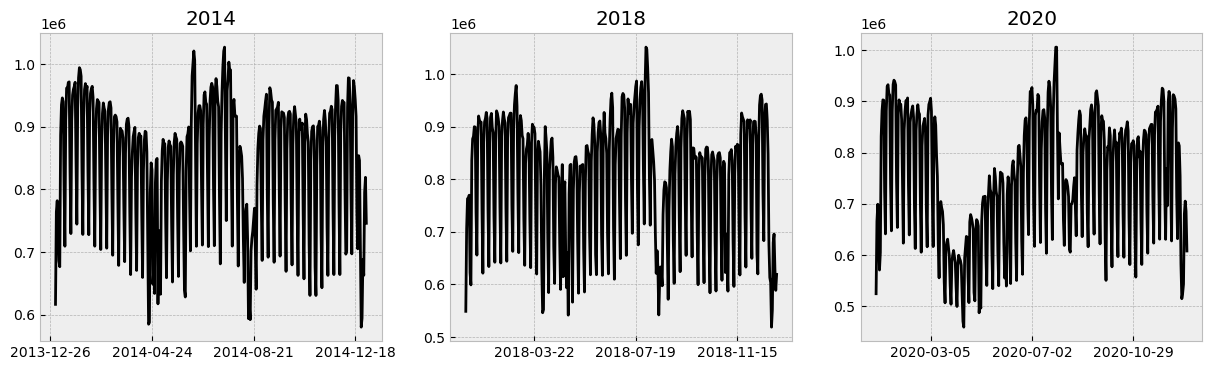

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(data.loc['2014'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(119))
plt.title("2014")
plt.subplot(1,3,2)
plt.plot(data.loc['2018'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(119))
plt.title("2018")
plt.subplot(1,3,3)
plt.plot(data.loc['2020'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(119))
plt.title("2020")
plt.show()

Note: the spring period is very low with respect to other years. Moreover, this make the period of summer-ending, that is usually a low as spring, higher in 2020 than in the other years 

## 3. Split the 2020

### 3.1 First part

In the first part of 2020 (first two months) the model seems to forecast values very good, or at least with same performances of previous years:

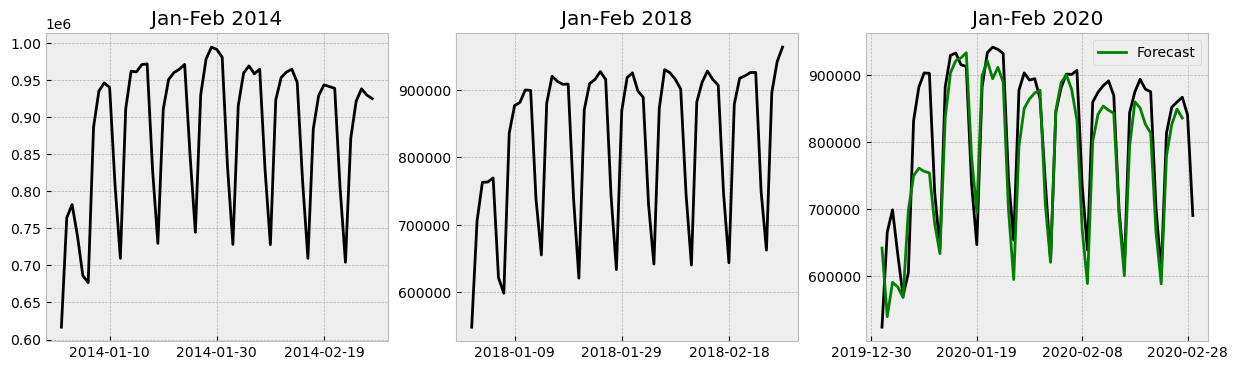

In [9]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(data.loc['2014-01':'2014-02'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.title("Jan-Feb 2014")
plt.subplot(1,3,2)
plt.plot(data.loc['2018-01':'2018-02'],color="black")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.title("Jan-Feb 2018")
plt.subplot(1,3,3)
plt.plot(data.loc['2020-01':'2020-02'],color="black")
plt.plot(preds_20[0:58],color='green', label = 'Forecast')
plt.legend()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.title("Jan-Feb 2020")
plt.show()

We can also see the RMSE of this specific part:

In [10]:
rmse_jf = mean_squared_error(data.loc['2020-01':'2020-02'].Load.values,
                          preds_20[0:60],squared = False)
print(rmse_jf)

print('relative measure of rmse w.r.t range:')
print(rmse_jf/(np.max(data.Load.values[0:60])-np.min(data.Load.values[0:60])))

55848.14059871619
relative measure of rmse w.r.t range:
0.13447694455974177


It is more similar to other years

### 3.2 First lockdown (covid 19)

Then, the real difference that was not possible to be intercepted is in the period of lockdown due to covid-19:

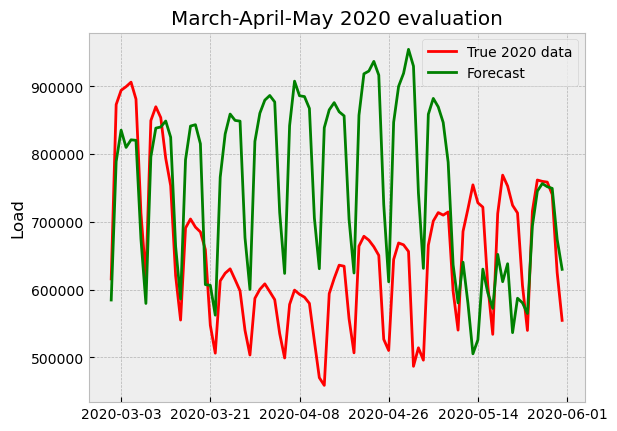

In [11]:
plt.plot(data.loc['2020-03':'2020-05'], color = "red",label = 'True 2020 data')
plt.plot(preds_20.loc['2020-03':'2020-05'], color='green', label = 'Forecast')
plt.ylabel('Load')
plt.title("March-April-May 2020 evaluation")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(18))
plt.legend()
plt.show()

The fact that a lot of industries/companies were not working in this period may affected the power load, and this was not foreseeable with data up to 2019

### 3.3 Post-lockdown

In the phase post-lockdown with reopenings is more similar to previous year and this part of 2020 is predicted by the model in the same manner of 2019:

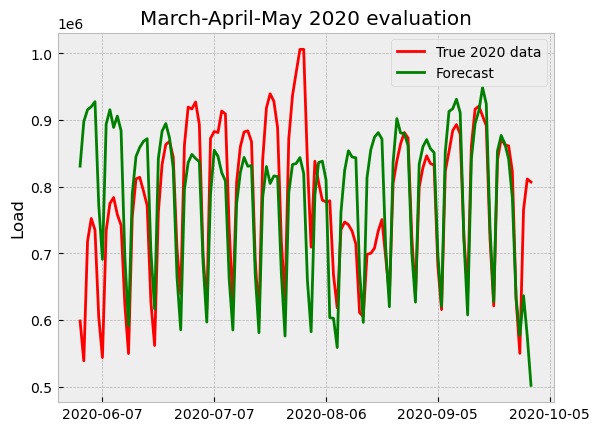

In [12]:
plt.plot(data.loc['2020-06':'2020-09'], color = "red",label = 'True 2020 data')
plt.plot(preds_20.loc['2020-06':'2020-09'], color='green', label = 'Forecast')
plt.ylabel('Load')
plt.title("March-April-May 2020 evaluation")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.legend()
plt.show()

## 4. Conclusion (looking ahead)

A positive fact that needs to be highlighted is that, as seen in challenge 4, in 2021 the relative RMSE is lower than 2020 (11%). This can be, froma  future perspective, a signal of "regularization" in Power Load for 2022 and eventually for future years.